In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import zipfile

# Define the path to the zip file
zip_file_path = "/content/drive/MyDrive/rask4/archive.zip"

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("/content/drive/MyDrive/rask4/")  # Extracts to the specified directory

# Now list the files in the directory
print(os.listdir("/content/drive/MyDrive/rask4/"))

# Any results you write to the current directory are saved as output.

['archive.zip', 'archive.zip (Unzipped Files)', 'leapGestRecog', 'leapgestrecog']


In [6]:
import os
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import IPython.display
path='/content/drive/MyDrive/rask4/leapGestRecog'
folders=os.listdir(path)
folders=set(folders)
import codecs
import json
different_classes=os.listdir(path+'/'+'00')
different_classes=set(different_classes)
print("The different classes that exist in this dataset are:")
print(different_classes,sep='\n')

The different classes that exist in this dataset are:
{'03_fist', '05_thumb', '07_ok', '08_palm_moved', '10_down', '09_c', '06_index', '04_fist_moved', '02_l', '01_palm'}


In [7]:
classes=dict()
names_of_classes=dict()
for i in different_classes:
    classes[int(i.split('_')[0])]='_'.join(i.split('_')[1:])
    names_of_classes['_'.join(i.split('_')[1:])]=int(i.split('_')[0])
print(classes)

{3: 'fist', 5: 'thumb', 7: 'ok', 8: 'palm_moved', 10: 'down', 9: 'c', 6: 'index', 4: 'fist_moved', 2: 'l', 1: 'palm'}


In [8]:
x=[]
z=[]
y=[] #converting the image to black and white
threshold=200
import cv2
for i in folders:
    print('***',i,'***')
    subject=path+'/'+i
    subdir=os.listdir(subject)
    subdir=set(subdir)
    for j in subdir:
        print(j)
        images=os.listdir(subject+'/'+j)
        for k in images:
            results=dict()
            results['y']=j.split('_')[0]
            img = cv2.imread(subject+'/'+j+'/'+k,0)
            img=cv2.resize(img,(int(160),int(60)))

            ret, imgf = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
            imgD=np.asarray(img,dtype=np.float64)
            z.append(imgD)
            imgf=np.asarray(imgf,dtype=np.float64)
            x.append(imgf)
            y.append(int(j.split('_')[0]))
            results['x']=imgf
print(list(set(y)))
# import pandas as pd
# df=pd.DataFrame({'x':x,'y':y})
# df.to_csv('results.csv',index=False)

*** 02 ***
03_fist
05_thumb
07_ok
08_palm_moved
10_down
09_c
06_index
04_fist_moved
02_l
01_palm
*** 05 ***
03_fist
05_thumb
07_ok
08_palm_moved
10_down
09_c
06_index
04_fist_moved
02_l
01_palm
*** 01 ***
03_fist
05_thumb
07_ok
08_palm_moved
10_down
09_c
06_index
04_fist_moved
02_l
01_palm
*** 00 ***
03_fist
05_thumb
07_ok
08_palm_moved
10_down
09_c
06_index
04_fist_moved
02_l
01_palm
*** 04 ***
03_fist
05_thumb
07_ok
08_palm_moved
10_down
09_c
06_index
04_fist_moved
02_l
01_palm
*** 07 ***
03_fist
05_thumb
07_ok
08_palm_moved
10_down
09_c
06_index
04_fist_moved
02_l
01_palm
*** 03 ***
03_fist
05_thumb
07_ok
08_palm_moved
10_down
09_c
06_index
04_fist_moved
02_l
01_palm
*** 08 ***
03_fist
05_thumb
07_ok
08_palm_moved
10_down
09_c
06_index
04_fist_moved
02_l
01_palm
*** 06 ***
03_fist
05_thumb
07_ok
08_palm_moved
10_down
09_c
06_index
04_fist_moved
02_l
01_palm
*** 09 ***
03_fist
05_thumb
07_ok
08_palm_moved
10_down
09_c
06_index
04_fist_moved
02_l
01_palm
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10

Class Label: 1


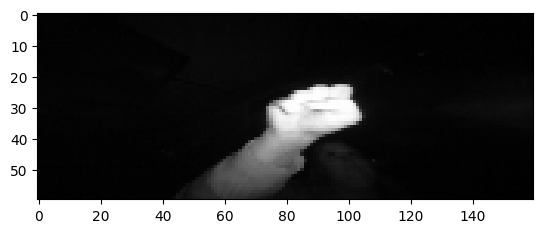

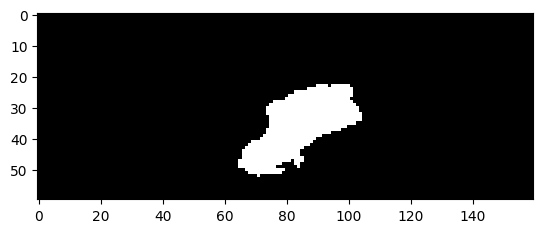

Class Label: 2


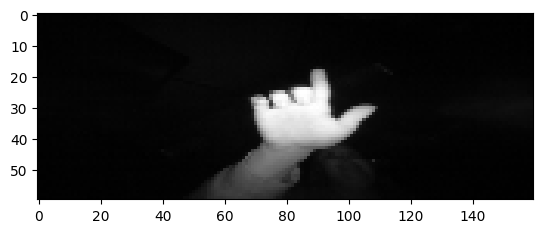

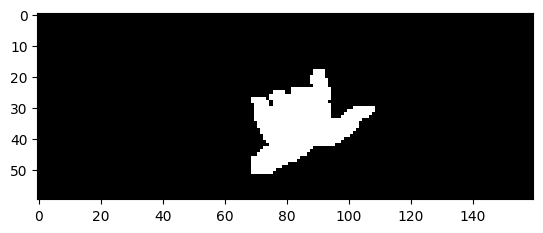

Class Label: 3


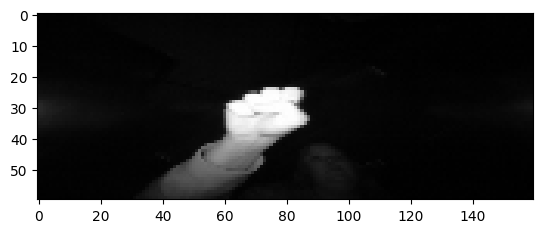

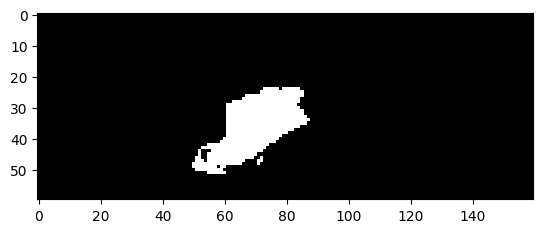

Class Label: 4


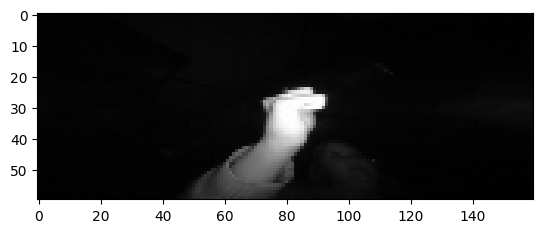

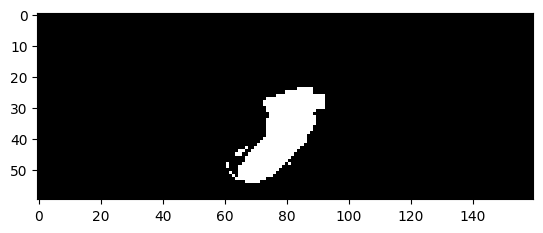

Class Label: 5


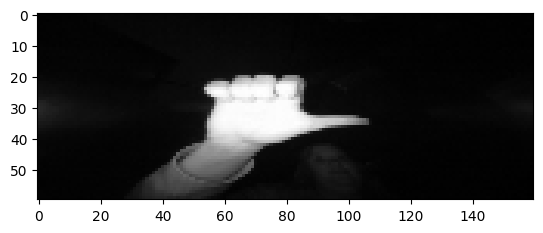

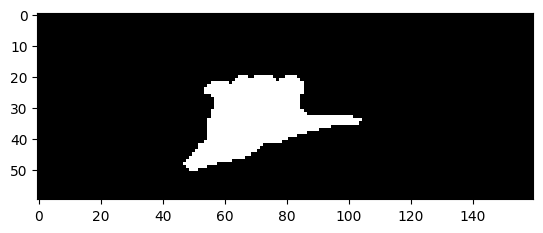

Class Label: 6


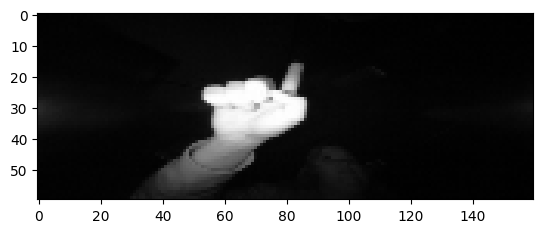

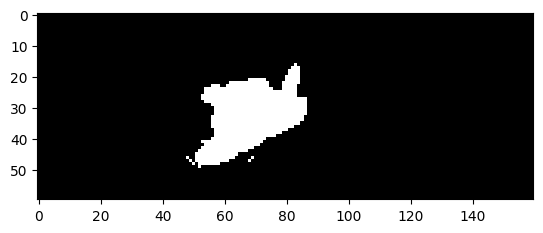

Class Label: 7


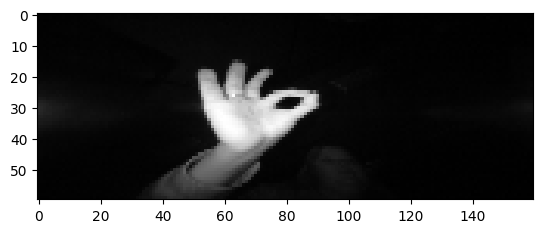

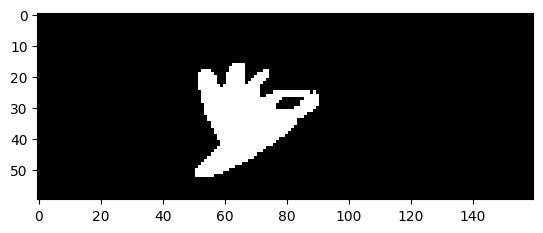

Class Label: 8


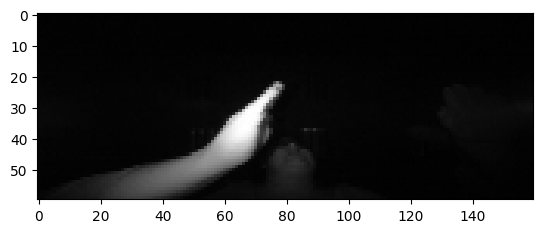

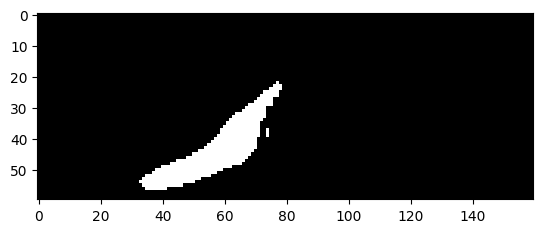

Class Label: 9


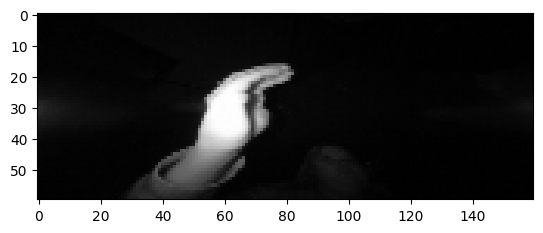

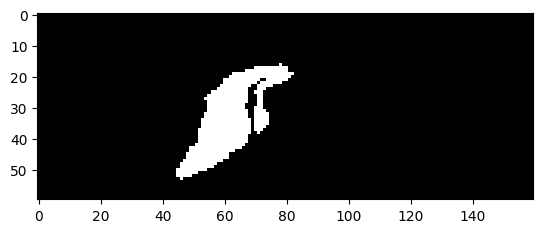

Class Label: 10


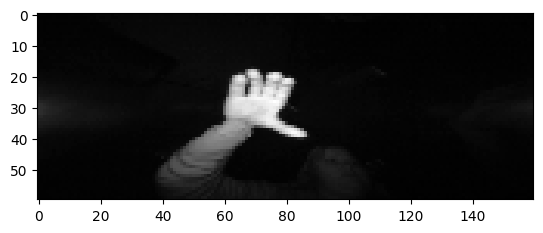

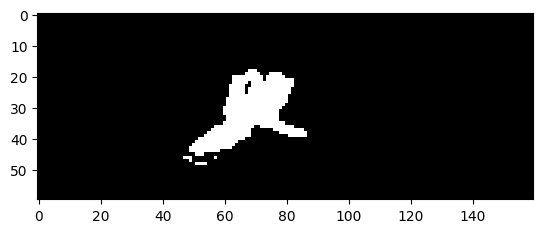

In [9]:
#sample black and white image from each class
l = []
list_names = []
for i in range(10):
    l.append(0)
for i in range(len(x)):
    if(l[y[i] - 1] == 0):
        l[y[i] - 1] = i
        if(len(np.unique(l)) == 10):
            break
for i in range(len(l)):
    %matplotlib inline
    print("Class Label: " + str(i + 1))
    plt.imshow(np.asarray(z[l[i]]), cmap  =cm.gray)
    plt.show()
    plt.imshow(np.asarray(x[l[i]]), cmap = cm.gray)
    plt.show()

In [10]:
x=np.array(x)
y=np.array(y)
y = y.reshape(len(x), 1)
print(x.shape)
print(y.shape)
print(max(y),min(y))

(20000, 60, 160)
(20000, 1)
[10] [1]


In [11]:
np.unique(y)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [12]:
import keras
from keras.utils import to_categorical
def one_hot_encoded(y):
    p=list(np.unique(y))
    dictionary=dict()
    final_result=[]
    for i in range(len(p)):
        dictionary[p[i]]=i
    for i in y:
        actual=[0 for j in range(len(p))]
        actual[dictionary[i[0]]]=1
        final_result.append(actual)
    return np.array(final_result)



y_data = one_hot_encoded(y)
print(y_data[0])
print(type(y_data))

[0 0 1 0 0 0 0 0 0 0]
<class 'numpy.ndarray'>


In [13]:
x_data = x.reshape((len(x), 60, 160, 1))

x_data/=255
print(x_data.shape)

(20000, 60, 160, 1)


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x_data,y_data,test_size = 0.2)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)

In [15]:
from keras import layers
from keras import models

In [16]:
model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(60, 160,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 77s 295ms/step - accuracy: 0.6759 - loss: 0.9351 - val_accuracy: 0.9970 - val_loss: 0.0102
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 75s 267ms/step - accuracy: 0.9912 - loss: 0.0405 - val_accuracy: 0.8875 - val_loss: 0.4638
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 266ms/step - accuracy: 0.9951 - loss: 0.0192 - val_accuracy: 0.9965 - val_loss: 0.0124
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 81s 263ms/step - accuracy: 0.9960 - loss: 0.0166 - val_accuracy: 0.9995 - val_loss: 0.0062
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 85s 276ms/step - accuracy: 1.0000 - loss: 2.8401e-05 - val_accuracy: 0.9995 - val_loss: 0.0071
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 75s 249ms/step - accuracy: 1.0000 - loss: 4.9531e-06 - val_accuracy: 0.9995 - val_loss: 0.0075
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 64s 254ms/step - accuracy: 1.0000 - loss: 2.9786e-06 - val_accuracy: 0.9995 - val_loss: 0.0078
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 256ms/step - accuracy: 1.00

In [18]:
model.save('cnn_results.h5')

In [19]:
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 1.0000 - loss: 6.0294e-04
Accuracy:1.0
